In [161]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
clean_df=pd.read_excel(r'./Clean_data.xls') ## Retriveing Data from file
clean_df.drop(['Unnamed: 0'], axis=1,inplace=True)
clean_df

,ID,year_Birth,Income,child_at_Home,teen_at_Home,Recency,amt_Wines,amt_Fruits,amt_MeatProducts,amt_FishProducts,...,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,Response,EducationCodes,marital_StatusCodes,Education,marital_Status,dt_Customer
0,5524.0,1957.0,58138,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0,0.0,0.0,0,1.0,2,4,Graduation,Single,2012-04-09
1,2174.0,1954.0,46344,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0,0.0,0.0,0,0.0,2,4,Graduation,Single,2014-08-03
2,4141.0,1965.0,71613,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0,0.0,0.0,0,0.0,2,5,Graduation,Together,2013-08-21
3,6182.0,1984.0,26646,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0,0.0,0.0,0,0.0,2,5,Graduation,Together,2014-10-02
4,5324.0,1981.0,58293,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0,0.0,0.0,0,0.0,4,3,PhD,Married,2014-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,1967.0,61223,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0,0.0,0.0,0,0.0,2,3,Graduation,Married,2013-03-03
2228,4001.0,1946.0,64014,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0,1.0,0.0,0,0.0,4,5,PhD,Together,2012-12-08
2229,7270.0,1981.0,56981,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,0,0.0,0.0,0,0.0,2,2,Graduation,Divorced,2014-05-18
2230,8235.0,1956.0,69245,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0,0.0,0.0,0,0.0,3,5,Master,Together,2013-03-16


In [162]:
from sklearn.model_selection import train_test_split
df_numerical=clean_df[clean_df.columns[~clean_df.columns.isin(['Education','marital_Status','dt_Customer'])]]
df_numerical


,ID,year_Birth,Income,child_at_Home,teen_at_Home,Recency,amt_Wines,amt_Fruits,amt_MeatProducts,amt_FishProducts,...,num_WebVisitsMonth,acceptedCmp3,acceptedCmp4,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,Response,EducationCodes,marital_StatusCodes
0,5524.0,1957.0,58138,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,7.0,0.0,0.0,0,0.0,0.0,0,1.0,2,4
1,2174.0,1954.0,46344,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,5.0,0.0,0.0,0,0.0,0.0,0,0.0,2,4
2,4141.0,1965.0,71613,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,4.0,0.0,0.0,0,0.0,0.0,0,0.0,2,5
3,6182.0,1984.0,26646,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,6.0,0.0,0.0,0,0.0,0.0,0,0.0,2,5
4,5324.0,1981.0,58293,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,5.0,0.0,0.0,0,0.0,0.0,0,0.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,1967.0,61223,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,5.0,0.0,0.0,0,0.0,0.0,0,0.0,2,3
2228,4001.0,1946.0,64014,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,7.0,0.0,0.0,0,1.0,0.0,0,0.0,4,5
2229,7270.0,1981.0,56981,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,6.0,0.0,1.0,0,0.0,0.0,0,0.0,2,2
2230,8235.0,1956.0,69245,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,3.0,0.0,0.0,0,0.0,0.0,0,0.0,3,5


### K-Means Clustering

In [163]:
from sklearn.cluster import KMeans


In [164]:
sse=[]

for k in range(1,10):
    km=KMeans(n_clusters=k,init='random',n_init=10,max_iter=300,random_state=34) 
    km.fit(df_numerical)
    sse.append(km.inertia_)

In [165]:
sse

[1412368989941.7778,
 697493240982.7554,
 545236543835.7119,
 381315063603.89935,
 141641961335.77936,
 109680717917.40695,
 76682909897.19093,
 64162732146.45608,
 54499481328.637566]

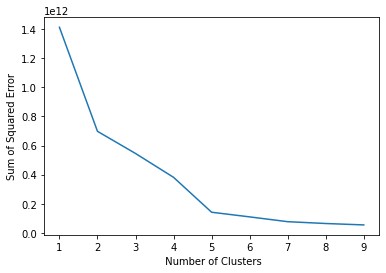

In [166]:
plt.plot(range(1,10),sse)
plt.xlabel(" Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

In [167]:
from kneed import KneeLocator

In [168]:
k=KneeLocator(range(1,10),sse,curve="convex",direction="decreasing")
k.elbow

5

In [169]:
kmeans=KMeans(n_clusters=5)  # defines the center

kmeans.fit(df_numerical)
cluster_means=kmeans.predict(df_numerical)
print("SSE Value:",kmeans.inertia_)    #  defines the lowest SSE Value. SSE is a sum of squared error which always need to minimum .
print("location of centroid :", kmeans.cluster_centers_)   # sepecifies the location of centroid

SSE Value: 141603150332.7886
location of centroid : [[ 5.68960217e+03  1.96585418e+03  6.34182988e+04  1.88854489e-01
   7.08359133e-01  4.82133127e+01  4.85136842e+02  3.70346749e+01
   2.13665635e+02  5.13900929e+01  3.66755418e+01  6.27535604e+01
   2.73808050e+00  5.66037152e+00  3.79040248e+00  8.05356037e+00
   4.55944272e+00  4.02476780e-02  1.14551084e-01  3.56037152e-02
   4.79876161e-02  1.73374613e-02  7.73993808e-03  1.16408669e-01
   2.51702786e+00  3.67956656e+00]
 [ 5.75846492e+03  1.97409839e+03  2.41192339e+04  7.91129032e-01
   2.25806452e-01  4.79858871e+01  1.94120968e+01  5.79798387e+00
   2.19040323e+01  8.35685484e+00  5.79637097e+00  1.64919355e+01
   2.02661290e+00  1.98669355e+00  4.58064516e-01  2.94354839e+00
   7.03306452e+00  8.06451613e-02  2.01612903e-03  8.32667268e-17
  -6.93889390e-17 -1.21430643e-17  1.00806452e-02  9.91935484e-02
   2.00000000e+00  3.71572581e+00]
 [ 9.43200000e+03  1.97700000e+03  6.66666000e+05  1.00000000e+00
   0.00000000e+00  2

In [170]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4])

In [171]:
clean_df['cluster_no'] = kmeans.labels_
df_numerical['cluster_no'] = kmeans.labels_

In [172]:
df_numerical.groupby(['cluster_no']).size()

cluster_no
0    646
1    496
2      1
3    695
4    394
dtype: int64

In [194]:
dfX_cluster=df_numerical.loc[:, df_numerical.columns != "Response"]
dfY_cluster=df_numerical.loc[:, df_numerical.columns.isin(['Response', 'cluster_no'])]
X_train, X_test, y_train, y_test = train_test_split(dfX_cluster,dfY_cluster, test_size=0.2, random_state=42)

In [195]:
 for x in range(5):
    globals()['X_train%s' % x] = X_train.loc[X_train['cluster_no'] == x, ~X_train.columns.isin(['cluster_no'])]
    globals()['y_train%s' % x] = y_train.loc[y_train['cluster_no'] == x,~y_train.columns.isin(['cluster_no'])]
    globals()['X_test%s' % x] = X_test.loc[X_test['cluster_no'] == x, ~X_test.columns.isin(['cluster_no'])]
    globals()['y_test%s' % x] = y_test.loc[y_test['cluster_no'] == x,~y_test.columns.isin(['cluster_no'])]

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

## Empty Dictionay to store accuracies

In [197]:
accuracies = {}

### KNN

In [205]:
test_set = pd.DataFrame(columns=['Response'])
pred = np.empty([0], dtype=int)
pred_for_cluster = []
for x in range(5):
    if x== 2:
        continue
    globals()['model_KNN%s' % x]=KNeighborsClassifier(n_neighbors=10)
    globals()['model_KNN%s' % x].fit(globals()['X_train%s' % x],globals()['y_train%s' % x]['Response'].astype('int'))
    test_set = pd.concat([test_set, globals()['y_test%s' % x]])
    pred_for_cluster = globals()['model_KNN%s' % x].predict(globals()['X_test%s' % x])
    pred = np.concatenate((pred,pred_for_cluster))

accuracies['knn'] = accuracy_score(test_set.astype('int'), pred)



## Logistic Regression

In [211]:
test_set = pd.DataFrame(columns=['Response'])
pred = np.empty([0], dtype=int)
pred_for_cluster = []
for x in range(5):
    if x== 2:
        continue
    globals()['model_Logistic%s' % x]=LogisticRegression()
    globals()['model_Logistic%s' % x].fit(globals()['X_train%s' % x],globals()['y_train%s' % x]['Response'].astype('int'))
    test_set = pd.concat([test_set, globals()['y_test%s' % x]])
    pred_for_cluster = globals()['model_Logistic%s' % x].predict(globals()['X_test%s' % x])
    pred = np.concatenate((pred,pred_for_cluster))

accuracies['logistic'] = accuracy_score(test_set.astype('int'), pred)


## DecisionTreeClassifier

In [212]:
test_set = pd.DataFrame(columns=['Response'])
pred = np.empty([0], dtype=int)
pred_for_cluster = []
for x in range(5):
    if x== 2:
        continue
    globals()['model_Decision%s' % x]=tree.DecisionTreeClassifier()
    globals()['model_Decision%s' % x].fit(globals()['X_train%s' % x],globals()['y_train%s' % x]['Response'].astype('int'))
    test_set = pd.concat([test_set, globals()['y_test%s' % x]])
    pred_for_cluster = globals()['model_Decision%s' % x].predict(globals()['X_test%s' % x])
    pred = np.concatenate((pred,pred_for_cluster))

accuracies['decisiontreeclassifier'] = accuracy_score(test_set.astype('int'), pred)


## RandomForestClassifier

In [213]:
test_set = pd.DataFrame(columns=['Response'])
pred = np.empty([0], dtype=int)
pred_for_cluster = []
for x in range(5):
    if x== 2:
        continue
    globals()['model_RandomForest%s' % x]=RandomForestClassifier(n_estimators=20)
    globals()['model_RandomForest%s' % x].fit(globals()['X_train%s' % x],globals()['y_train%s' % x]['Response'].astype('int'))
    test_set = pd.concat([test_set, globals()['y_test%s' % x]])
    pred_for_cluster = globals()['model_RandomForest%s' % x].predict(globals()['X_test%s' % x])
    pred = np.concatenate((pred,pred_for_cluster))

accuracies['RandomForestClassifier'] = accuracy_score(test_set.astype('int'), pred)


In [214]:
accuracies

{'knn': 0.8411633109619687,
 'logistic': 0.8165548098434005,
 'decisiontreeclassifier': 0.8031319910514542,
 'RandomForestClassifier': 0.8568232662192393}